MySQL is one of the most popular database management systems (DBMSs) on the market today. It ranked second only to the Oracle DBMS in this year’s DB-Engines Ranking. As most software applications need to interact with data in some form, programming languages like Python provide tools for storing and accessing these data sources.

Using the techniques discussed in this session, you’ll be able to efficiently integrate a MySQL database with a Python application. You’ll develop a small MySQL database for a movie rating system and learn how to query it directly from your Python code.

By the end of this tutorial, you’ll be able to:

1. Identify unique features of MySQL
2. Connect your application to a MySQL database
3. Query the database to fetch required data
4. Handle exceptions that occur while accessing the database
5. Use best practices while building database applications

To get the most out of this tutorial, you should have a working knowledge of Python concepts like for loops, functions, exception handling, and installing Python packages using pip. You should also have a basic understanding of relational database management systems and SQL queries like SELECT, DROP, CREATE, and JOIN.

# Comparing MySQL to Other SQL Databases

SQL stands for Structured Query Language and is a widely used programming language for managing relational databases. You may have heard of the different flavors of SQL-based DBMSs. The most popular ones include MySQL, PostgreSQL, SQLite, and SQL Server. All of these databases are compliant with the SQL standards but with varying degrees of compliance.

Being open source since its inception in 1995, MySQL quickly became a market leader among SQL solutions. MySQL is also a part of the Oracle ecosystem. While its core functionality is completely free, there are some paid add-ons as well. Currently, MySQL is used by all major tech firms, including Google, LinkedIn, Uber, Netflix, Twitter, and others.

Apart from a large open source community for support, there are many other reasons for MySQL’s success:

Apart from a large open source community for support, there are many other reasons for MySQL’s success:

1. Ease of installation: MySQL was designed to be user-friendly. It’s quite straightforward to set up a MySQL database, and several widely available third-party tools, like phpMyAdmin, further streamline the setup process. MySQL is available for all major operating systems, including Windows, macOS, Linux, and Solaris.

2. Speed: MySQL holds a reputation for being an exceedingly fast database solution. It has a relatively smaller footprint and is extremely scalable in the long run.

3. User privileges and security: MySQL comes with a script that allows you to set the password security level, assign admin passwords, and add and remove user account privileges. This script uncomplicates the admin process for a web hosting user management portal. Other DBMSs, like PostgreSQL, use config files that are more complicated to use.

# Installing MySQL Server and MySQL Connector/Python

Now, to start working through this tutorial, you need to set up two things: a MySQL server and a MySQL connector. MySQL server will provide all the services required for handling your database. Once the server is up and running, you can connect your Python application with it using MySQL Connector/Python.

# Installing MySQL Server

For Windows, the best way is to download MySQL Installer and let it take care of the entire process. The installation manager also helps you configure the security settings of the MySQL server. On the Accounts and Roles page, you need to enter a password for the root (admin) account and also optionally add other users with varying privileges:

# Installing MySQL Connector/Python

# Establishing a Connection

The first step in interacting with a MySQL server is to establish a connection. To do this, you need connect() from the mysql.connector module. This function takes in parameters like host, user, and password and returns a MySQLConnection object. You can receive these credentials as input from the user and pass them to connect():

The code below uses the entered login credentials to establish a connection with your MySQL server. In return, you get a MySQLConnection object, which is stored in the connection variable. From now on, you’ll use this variable to access your MySQL server.

In [10]:
from getpass import getpass
from mysql.connector import connect, Error

try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
    ) as connection:
        print(connection)
except Error as e:
    print(e)

Enter username: root
Enter password: ········


# CRUD operation - CREATE, READ, UPDATE, DELETE

# Creating a New Database

In the last section, you established a connection with your MySQL server. To create a new database, you need to execute a SQL statement:

CREATE DATABASE books_db;

The above statement will create a new database with the name books_db.

Note: In MySQL, it’s mandatory to put a semicolon (;) at the end of a statement, which denotes the termination of a query. However, MySQL Connector/Python automatically appends a semicolon at the end of your queries, so there’s no need to use it in your Python code.

# Creating a new database online_movie_rating

In [6]:
from getpass import getpass
from mysql.connector import connect, Error

try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
    ) as connection:
        create_db_query = "CREATE DATABASE online_movie_rating"
        with connection.cursor() as cursor:
            cursor.execute(create_db_query)
except Error as e:
    print(e)

Enter username: root
Enter password: ········


After executing of the code above, you’ll have a new database called online_movie_rating in your MySQL server.

The CREATE DATABASE query is stored as a string in the create_db_query variable and then passed to cursor.execute() for execution. The code uses a context manager with the cursor object to handle the cleanup process.

You might receive an error here if a database with the same name already exists in your server. To confirm this, you can display the name of all databases in your server. Using the same MySQLConnection object from earlier, execute the SHOW DATABASES statement:

In [10]:
connection.reconnect()
show_db_query = "SHOW DATABASES"
with connection.cursor() as cursor:
        cursor.execute(show_db_query)
        for db in cursor:
            print(db)

('information_schema',)
('mysql',)
('online_movie_rating',)
('performance_schema',)
('sys',)


The above code prints the names of all the databases currently in your MySQL server. The SHOW DATABASES command also outputs some databases that you didn’t create in your server, like information_schema, performance_schema, and so on. These databases are generated automatically by the MySQL server and provide access to a variety of database metadata and MySQL server settings.

You created a new database in this section by executing the CREATE DATABASE statement. In the next section, you’ll see how to connect to a database that already exists.

# Connecting to an Existing Database

In the last section, you created a new database called online_movie_rating. However, you still haven’t connected to it. In many situations, you’ll already have a MySQL database that you want to connect with your Python application.

You can do this using the same connect() function that you used earlier by sending an additional parameter called database:

In [3]:
from getpass import getpass
from mysql.connector import connect, Error

try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="online_movie_rating",
    ) as connection:
        print(connection)
except Error as e:
    print(e)

Enter username: root
Enter password: ········


The above code is very similar to the connection script that you used earlier. The only change here is an additional database parameter, where the name of your database is passed to connect(). Once you execute this script, you’ll be connected to the online_movie_rating database.

# Creating, Altering, and Dropping a Table

In this section, you’ll learn how to perform some basic DDL queries like CREATE, DROP, and ALTER with Python. You’ll get a quick look at the MySQL database that you’ll use in the rest of this SQL learning. You’ll also create all the tables required for the database and learn how to perform modifications on these tables later on.

## The image below depicts the database schema:

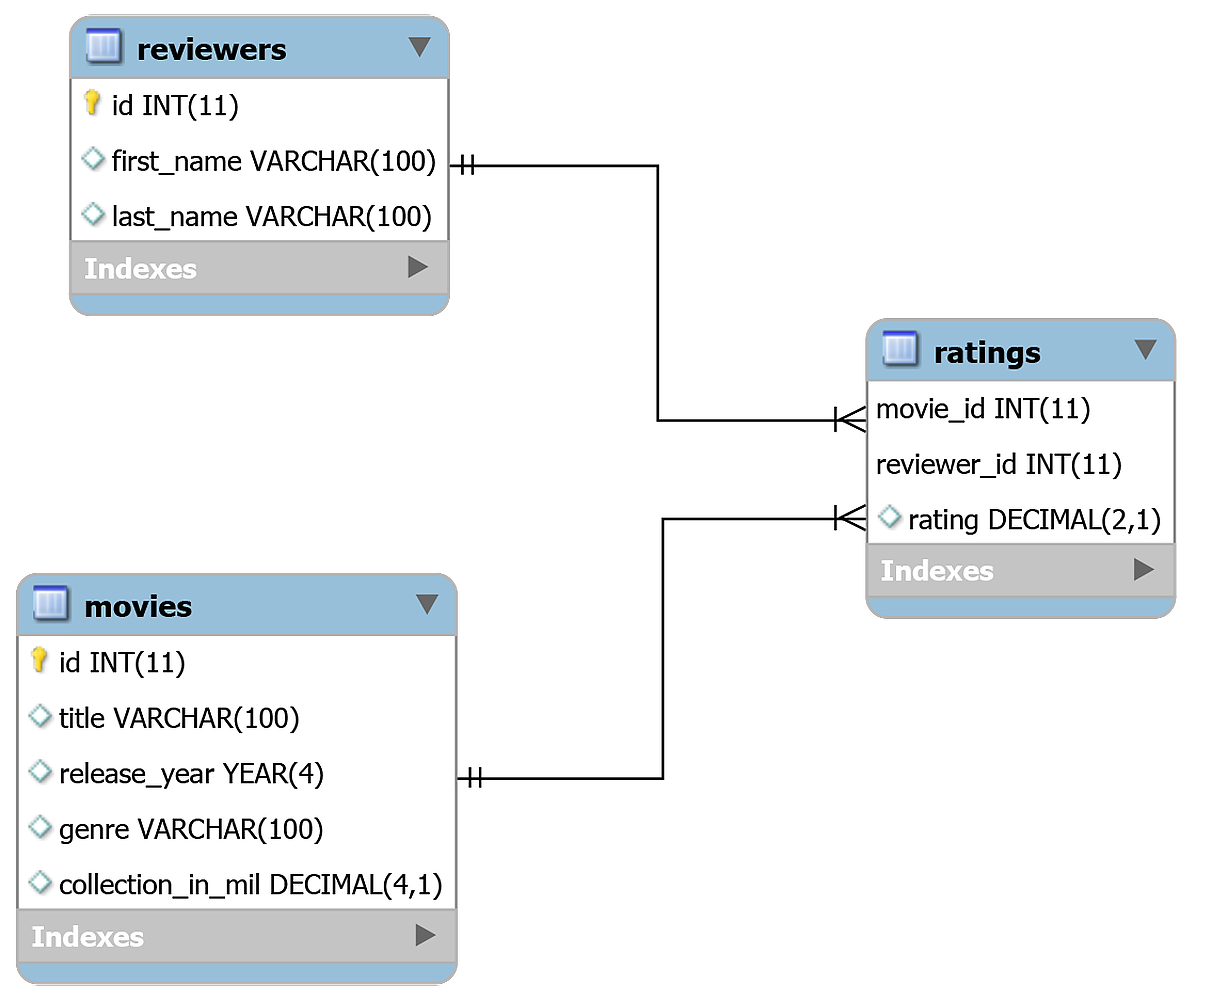

The tables in this database are related to each other. movies and reviewers will have a many-to-many relationship since one movie can be reviewed by multiple reviewers and one reviewer can review multiple movies. The ratings table connects the movies table with the reviewers table.

# Creating Tables Using the CREATE TABLE Statement

Now, to create a new table in MySQL, you need to use the CREATE TABLE statement. The following MySQL query will create the movies table for your online_movie_rating database:

In [13]:
connection.reconnect()
create_movies_table_query = """
CREATE TABLE movies(
    id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(100),
    release_year YEAR(4),
    genre VARCHAR(100),
    collection_in_mil INT
)
"""
with connection.cursor() as cursor:
    cursor.execute(create_movies_table_query)
    connection.commit()

Now you have the movies table in your database. You pass create_movies_table_query to cursor.execute(), which performs the required execution.

Note: The connection variable refers to the MySQLConnection object that was returned when you connected to your database.

In [23]:
#connection.reconnect()
#drop_table_query = "DROP TABLE reviewers"  ## first we have to drop the foreign key table ratings before droping reviewers
#with connection.cursor() as cursor:
#    cursor.execute(drop_table_query)

In [20]:
connection.reconnect()
create_reviewers_table_query = """
CREATE TABLE reviewers (
    id INT AUTO_INCREMENT PRIMARY KEY,
    first_name VARCHAR(100),
    last_name VARCHAR(100)
)
"""
with connection.cursor() as cursor:
    cursor.execute(create_reviewers_table_query)
    connection.commit()

If required, you could add more information about a reviewer, such as their email ID or demographic information. But first_name and last_name will serve your purpose for now.

Finally, you can create the ratings table using the following script:

In [21]:
connection.reconnect()
create_ratings_table_query = """
CREATE TABLE ratings (
    movie_id INT,
    reviewer_id INT,
    rating DECIMAL(2,1),
    FOREIGN KEY(movie_id) REFERENCES movies(id),
    FOREIGN KEY(reviewer_id) REFERENCES reviewers(id),
    PRIMARY KEY(movie_id, reviewer_id)
)
"""
with connection.cursor() as cursor:
    cursor.execute(create_ratings_table_query)
    connection.commit()

The implementation of foreign key relationships in MySQL is slightly different and limited as compared to the standard SQL. In MySQL, both the parent and the child in the foreign key constraint must use the same storage engine.

A storage engine is the underlying software component that a database management system uses for performing SQL operations. In MySQL, storage engines come in two different flavors:

# Showing a Table Schema Using the DESCRIBE Statement

In [14]:
connection.reconnect()
show_table_query = "DESCRIBE movies"
with connection.cursor() as cursor:
        cursor.execute(show_table_query)
        
         # Fetch rows from last executed query
            
        result = cursor.fetchall()
        
        for row in result:
            print(row)

('id', b'int', 'NO', 'PRI', None, 'auto_increment')
('title', b'varchar(100)', 'YES', '', None, '')
('release_year', b'year', 'YES', '', None, '')
('genre', b'varchar(100)', 'YES', '', None, '')
('collection_in_mil', b'int', 'YES', '', None, '')


Once you execute the above code, you should receive a table containing information about all the columns in movies table. For each column, you’ll receive details like the column’s data type, whether the column is a primary key, and so on.

# Modifying a Table Schema Using the ALTER Statement

In [19]:
alter_table_query = """
    ALTER TABLE movies
    MODIFY COLUMN collection_in_mil DECIMAL(4,1)
    """
show_table_query = "DESCRIBE movies"
with connection.cursor() as cursor:
        cursor.execute(alter_table_query)
        cursor.execute(show_table_query)
        # Fetch rows from last executed query
        result = cursor.fetchall()
        print("Movie Table Schema after alteration:")
        for row in result:
            print(row)

Movie Table Schema after alteration:
('id', b'int', 'NO', 'PRI', None, 'auto_increment')
('title', b'varchar(100)', 'YES', '', None, '')
('release_year', b'year', 'YES', '', None, '')
('genre', b'varchar(100)', 'YES', '', None, '')
('collection_in_mil', b'decimal(4,1)', 'YES', '', None, '')


As shown in the output, the collection_in_mil attribute is now of type DECIMAL(4,1). Also note that in the code above, you call cursor.execute() twice. But cursor.fetchall() fetches rows from only the last executed query, which is the show_table_query.

# Deleting Tables Using the DROP Statement

To delete a table, you need to execute the DROP TABLE statement in MySQL. Deleting a table is an irreversible process. If you execute the code below, then you’ll need to call the CREATE TABLE query again to use the ratings table in the upcoming sections.

To delete the ratings table, send drop_table_query to cursor.execute():

# Inserting Records in Tables

In the last section, you created three tables in your database: movies, reviewers, and ratings. Now you need to populate these tables with data. This section will cover two different ways to insert records in the MySQL Connector for Python.

The first method, .execute(), works well when the number of records is small and the records can be hard-coded. The second method, .executemany(), is more popular and is better suited for real-world scenarios.

In [21]:
insert_movies_query = """
INSERT INTO movies (title, release_year, genre, collection_in_mil)
VALUES
    ("Forrest Gump", 1994, "Drama", 330.2),
    ("3 Idiots", 2009, "Drama", 2.4),
    ("Eternal Sunshine of the Spotless Mind", 2004, "Drama", 34.5),
    ("Good Will Hunting", 1997, "Drama", 138.1),
    ("Skyfall", 2012, "Action", 304.6),
    ("Gladiator", 2000, "Action", 188.7),
    ("Black", 2005, "Drama", 3.0),
    ("Titanic", 1997, "Romance", 659.2),
    ("The Shawshank Redemption", 1994, "Drama",28.4),
    ("Udaan", 2010, "Drama", 1.5),
    ("Home Alone", 1990, "Comedy", 286.9),
    ("Casablanca", 1942, "Romance", 1.0),
    ("Avengers: Endgame", 2019, "Action", 858.8),
    ("Night of the Living Dead", 1968, "Horror", 2.5),
    ("The Godfather", 1972, "Crime", 135.6),
    ("Haider", 2014, "Action", 4.2),
    ("Inception", 2010, "Adventure", 293.7),
    ("Evil", 2003, "Horror", 1.3),
    ("Toy Story 4", 2019, "Animation", 434.9),
    ("Air Force One", 1997, "Drama", 138.1),
    ("The Dark Knight", 2008, "Action",535.4),
    ("Bhaag Milkha Bhaag", 2013, "Sport", 4.1),
    ("The Lion King", 1994, "Animation", 423.6),
    ("Pulp Fiction", 1994, "Crime", 108.8),
    ("Kai Po Che", 2013, "Sport", 6.0),
    ("Beasts of No Nation", 2015, "War", 1.4),
    ("Andadhun", 2018, "Thriller", 2.9),
    ("The Silence of the Lambs", 1991, "Crime", 68.2),
    ("Deadpool", 2016, "Action", 363.6),
    ("Drishyam", 2015, "Mystery", 3.0)
"""
with connection.cursor() as cursor:
    cursor.execute(insert_movies_query)
    connection.commit()

# Using .executemany()

The previous approach is more suitable when the number of records is fairly small and you can write these records directly into the code. But this is rarely true. You’ll often have this data stored in some other file, or the data will be generated by a different script and will need to be added to the MySQL database.

This is where .executemany() comes in handy. It accepts two parameters:

A query that contains placeholders for the records that need to be inserted

A list that contains all records that you wish to insert

The following example inserts records for the reviewers table:

In [22]:
insert_reviewers_query = """
INSERT INTO reviewers
(first_name, last_name)
VALUES ( %s, %s )
"""
reviewers_records = [
    ("Chaitanya", "Baweja"),
    ("Mary", "Cooper"),
    ("John", "Wayne"),
    ("Thomas", "Stoneman"),
    ("Penny", "Hofstadter"),
    ("Mitchell", "Marsh"),
    ("Wyatt", "Skaggs"),
    ("Andre", "Veiga"),
    ("Sheldon", "Cooper"),
    ("Kimbra", "Masters"),
    ("Kat", "Dennings"),
    ("Bruce", "Wayne"),
    ("Domingo", "Cortes"),
    ("Rajesh", "Koothrappali"),
    ("Ben", "Glocker"),
    ("Mahinder", "Dhoni"),
    ("Akbar", "Khan"),
    ("Howard", "Wolowitz"),
    ("Pinkie", "Petit"),
    ("Gurkaran", "Singh"),
    ("Amy", "Farah Fowler"),
    ("Marlon", "Crafford"),
]
with connection.cursor() as cursor:
    cursor.executemany(insert_reviewers_query, reviewers_records)
    connection.commit()

In [24]:
insert_ratings_query = """
INSERT INTO ratings
(rating, movie_id, reviewer_id)
VALUES ( %s, %s, %s)
"""

In [26]:
ratings_records = [(6.4, 17, 5), (5.6, 19, 1), (6.3, 22, 14), (5.1, 21, 17),
    (5.0, 5, 5), (6.5, 21, 5), (8.5, 30, 13), (9.7, 6, 4),
    (8.5, 24, 12), (9.9, 14, 9), (8.7, 26, 14), (9.9, 6, 10),
    (5.1, 30, 6), (5.4, 18, 16), (6.2, 6, 20), (7.3, 21, 19),
    (8.1, 17, 18), (5.0, 7, 2), (9.8, 23, 3), (8.0, 22, 9),
    (8.5, 11, 13), (5.0, 5, 11), (5.7, 8, 2), (7.6, 25, 19),
    (5.2, 18, 15), (9.7, 13, 3), (5.8, 18, 8), (5.8, 30, 15),
    (8.4, 21, 18), (6.2, 23, 16), (7.0, 10, 18), (9.5, 30, 20),
    (8.9, 3, 19), (6.4, 12, 2), (7.8, 12, 22), (9.9, 15, 13),
    (7.5, 20, 17), (9.0, 25, 6), (8.5, 23, 2), (5.3, 30, 17),
    (6.4, 5, 10), (8.1, 5, 21), (5.7, 22, 1), (6.3, 28, 4),
    (9.8, 13, 1)
]

with connection.cursor() as cursor:
    cursor.executemany(insert_ratings_query, ratings_records)
    connection.commit()

All three tables are now populated with data. You now have a fully functional online movie rating database. The next step is to understand how to interact with this database.

# Reading Records Using the SELECT Statement

In [33]:
select_movies_query = "SELECT * FROM movies LIMIT 5"
with connection.cursor() as cursor:
    cursor.execute(select_movies_query)
    result = cursor.fetchall()
    for row in result:
        print(row)

(1, 'Forrest Gump', 1994, 'Drama', Decimal('330.2'))
(2, '3 Idiots', 2009, 'Drama', Decimal('2.4'))
(3, 'Eternal Sunshine of the Spotless Mind', 2004, 'Drama', Decimal('34.5'))
(4, 'Good Will Hunting', 1997, 'Drama', Decimal('138.1'))
(5, 'Skyfall', 2012, 'Action', Decimal('304.6'))


The first argument specifies an offset of 2, and the second argument constrains the number of returned rows to 5. The above query will return rows 3 to 7.

You can also query for selected columns:

In [46]:
select_movies_query = "SELECT title, release_year FROM movies LIMIT 5"
with connection.cursor() as cursor:
     cursor.execute(select_movies_query)
     for row in cursor.fetchall():
            print(row)

('Forrest Gump', 1994)
('3 Idiots', 2009)
('Eternal Sunshine of the Spotless Mind', 2004)
('Good Will Hunting', 1997)
('Skyfall', 2012)


Now, the code outputs values only from the two specified columns: title and release_year.

# Filtering Results Using the WHERE Clause

In [48]:
select_movies_query = """
    SELECT title, collection_in_mil
    FROM movies
    WHERE collection_in_mil > 300
    ORDER BY collection_in_mil DESC
    """
with connection.cursor() as cursor:
        cursor.execute(select_movies_query)
        for movie in cursor.fetchall():
            print(movie)

('Avengers: Endgame', Decimal('858.8'))
('Titanic', Decimal('659.2'))
('The Dark Knight', Decimal('535.4'))
('Toy Story 4', Decimal('434.9'))
('The Lion King', Decimal('423.6'))
('Deadpool', Decimal('363.6'))
('Forrest Gump', Decimal('330.2'))
('Skyfall', Decimal('304.6'))


In [50]:
select_movies_query = """
    SELECT CONCAT(title, " (", release_year, ")"),
         collection_in_mil
    FROM movies
    ORDER BY collection_in_mil DESC
    LIMIT 5
 """
with connection.cursor() as cursor:
        cursor.execute(select_movies_query)
        for movie in cursor.fetchall():
            print(movie)

('Avengers: Endgame (2019)', Decimal('858.8'))
('Titanic (1997)', Decimal('659.2'))
('The Dark Knight (2008)', Decimal('535.4'))
('Toy Story 4 (2019)', Decimal('434.9'))
('The Lion King (1994)', Decimal('423.6'))


In [52]:
select_movies_query = """
    SELECT CONCAT(title, " (", release_year, ")"),
          collection_in_mil
    FROM movies
    ORDER BY collection_in_mil DESC
    """
with connection.cursor() as cursor:
        cursor.execute(select_movies_query)
        for movie in cursor.fetchmany(size=5):
            print(movie)
        cursor.fetchall()

('Avengers: Endgame (2019)', Decimal('858.8'))
('Titanic (1997)', Decimal('659.2'))
('The Dark Knight (2008)', Decimal('535.4'))
('Toy Story 4 (2019)', Decimal('434.9'))
('The Lion King (1994)', Decimal('423.6'))


# Handling Multiple Tables Using the JOIN Statement

If you found the queries in the last section to be quite straightforward, don’t worry. You can make your SELECT queries as complex as you want using the same methods from the last section.

Let’s look at some slightly more complex JOIN queries. If you want to find out the name of the top five highest-rated movies in your database, then you can run the following query:

In [4]:
connection.reconnect()
select_movies_query = """
    SELECT title, AVG(rating) as average_rating
    FROM ratings
    INNER JOIN movies
        ON movies.id = ratings.movie_id
    GROUP BY movie_id
    ORDER BY average_rating DESC
    LIMIT 5
    """
with connection.cursor() as cursor:
        cursor.execute(select_movies_query)
        for movie in cursor.fetchall():
            print(movie)

('The Godfather', Decimal('9.90000'))
('Night of the Living Dead', Decimal('9.90000'))
('Avengers: Endgame', Decimal('9.75000'))
('Eternal Sunshine of the Spotless Mind', Decimal('8.90000'))
('Beasts of No Nation', Decimal('8.70000'))


As shown above, Night of the Living Dead and The Godfather are tied as the highest-rated movies in your online_movie_rating database.

To find the name of the reviewer who gave the most ratings, write the following query:

In [7]:
connection.reconnect()
select_movies_query = """
    SELECT CONCAT(first_name, " ", last_name), COUNT(*) as num
    FROM reviewers
    INNER JOIN ratings
        ON reviewers.id = ratings.reviewer_id
    GROUP BY reviewer_id
    ORDER BY num DESC
    LIMIT 1
    """
with connection.cursor() as cursor:
        cursor.execute(select_movies_query)
        for movie in cursor.fetchall():
            print(movie)

('Mary Cooper', 4)


Mary Cooper is the most frequent reviewer in this database. As seen above, it doesn’t matter how complicated the query is because it’s ultimately handled by the MySQL server. Your process for executing a query will always remain the same: pass the query to cursor.execute() and fetch the results using .fetchall().

# Updating and Deleting Records From the Database

In this section, you’ll be updating and deleting records from the database. Both of these operations can be performed on either a single record or multiple records in the table. You’ll select the rows that need to be modified using the WHERE clause.

# UPDATE Command

One of the reviewers in your database, Amy Farah Fowler, is now married to Sheldon Cooper. Her last name has now changed to Cooper, so you need to update your database accordingly. For updating records, MySQL uses the UPDATE statement:

In [8]:
connection.reconnect()
update_query = """
UPDATE
    reviewers
SET
    last_name = "Cooper"
WHERE
    first_name = "Amy"
"""
with connection.cursor() as cursor:
    cursor.execute(update_query)
    connection.commit()

The code passes the update query to cursor.execute(), and .commit() brings the required changes to the reviewers table.

Note: In the UPDATE query, the WHERE clause helps specify the records that need to be updated. If you don’t use WHERE, then all records will be updated!

Suppose you need to provide an option that allows reviewers to modify ratings. A reviewer will provide three values, movie_id, reviewer_id, and the new rating. The code will display the record after performing the specified modification.

Assuming that movie_id = 18, reviewer_id = 15, and the new rating = 5.0, you can use the following MySQL queries to perform the required modification

The above queries first update the rating and then display it.

In [9]:
from getpass import getpass
from mysql.connector import connect, Error

movie_id = input("Enter movie id: ")
reviewer_id = input("Enter reviewer id: ")
new_rating = input("Enter new rating: ")
update_query = """
UPDATE
    ratings
SET
    rating = "%s"
WHERE
    movie_id = "%s" AND reviewer_id = "%s";

SELECT *
FROM ratings
WHERE
    movie_id = "%s" AND reviewer_id = "%s"
""" % (
    new_rating,
    movie_id,
    reviewer_id,
    movie_id,
    reviewer_id,
)


with connection.cursor() as cursor:
            for result in cursor.execute(update_query, multi=True):
                if result.with_rows:
                    print(result.fetchall())
            connection.commit()

Enter movie id: 18
Enter reviewer id: 15
Enter new rating: 5.0
[(18, 15, Decimal('5.0'))]


# DELETE Command

Deleting records works very similarly to updating records. You use the DELETE statement to remove selected records.

It’s recommended that you first run a SELECT query with the same filter to make sure that you’re deleting the right records. For example, to remove all ratings given by reviewer_id = 2, you should first run the corresponding SELECT query:

In [12]:
select_movies_query = """
    SELECT reviewer_id, movie_id FROM ratings
    WHERE reviewer_id = 2
    """
with connection.cursor() as cursor:
        cursor.execute(select_movies_query)
        for movie in cursor.fetchall():
            print(movie)

The above code snippet outputs the reviewer_id and movie_id for records in the ratings table where reviewer_id = 2. Once you’ve confirmed that these are the records that you need to delete, you can run a DELETE query with the same filter:

In [11]:
delete_query = "DELETE FROM ratings WHERE reviewer_id = 2"
with connection.cursor() as cursor:
    cursor.execute(delete_query)
    connection.commit()

With this query, you remove all ratings given by the reviewer with reviewer_id = 2 from the ratings table.

We can confirm it by running the above select query again... we will see no result means no record are there for that condition.

Other Ways to Connect Python and MySQL

In this SQL section, you saw MySQL Connector/Python, which is the officially recommended means of interacting with a MySQL database from a Python application. There are two other popular connectors:

1. mysqlclient is a library that is a close competitor to the official connector and is actively updated with new features. Because its core is written in C, it has better performance than the pure-Python official connector. A big drawback is that it’s fairly difficult to set up and install, especially on Windows.

2. MySQLdb is a legacy software that’s still used in commercial applications. It’s written in C and is faster than MySQL Connector/Python but is available only for Python 2.

These connectors act as interfaces between your program and a MySQL database, and you send your SQL queries through them. But many developers prefer using an object-oriented paradigm rather than SQL queries to manipulate data.

Object-relational mapping (ORM) is a technique that allows you to query and manipulate data from a database directly using an object-oriented language. An ORM library encapsulates the code needed to manipulate data, which eliminates the need to use even a tiny bit of SQL. Here are the most popular Python ORMs for SQL-based databases:

1. SQLAlchemy is an ORM that facilitates communication between Python and other SQL databases. You can create different engines for different databases like MySQL, PostgreSQL, SQLite, and so on. SQLAlchemy is commonly used alongside the pandas library to provide complete data-handling functionality.

2. peewee is a lightweight and fast ORM that’s quick to set up. This is quite useful when your interaction with the database is limited to extracting a few records. For example, if you need to copy selected records from a MySQL database into a CSV file, then peewee might be your best choice.

3. Django ORM is one of the most powerful features of Django and is supplied alongside the Django web framework. It can interact with a variety of databases such as SQLite, PostgreSQL, and MySQL. Many Django-based applications use the Django ORM for data modeling and basic queries but often switch to SQLAlchemy for more complex requirements.

You might find one of these approaches to be more suitable for your application. If you’re not sure which one to use, then it’s best to go with the officially recommended MySQL Connector/Python that you saw in action in this section.

# Conclusion

In this section, you saw how to use MySQL Connector/Python to integrate a MySQL database with your Python application. You also saw some unique features of a MySQL database that differentiate it from other SQL databases.

Along the way, you learned some programming best practices that are worth considering when it comes to establishing a connection, creating tables, and inserting and updating records in a database application. You also developed a sample MySQL database for an online movie rating system and interacted with it directly from your Python application.

In this section, you learned how to:

1. Connect your Python app with a MySQL database

2. Bring data from a MySQL database into Python for further analysis

3. Execute SQL queries from your Python application

4. Handle exceptions while accessing the database

If you’re interested, Python also has connectors for other DBMSs like MongoDB and PostgreSQL. For which one can research.